In [417]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sqlite3 import connect
conn = connect(':memory:')
from itertools import groupby

In [418]:
exe = open('gpt_neo_exec_metrics.json')
# tests = open('gpt_neo_test_preds.json')

metric = json.load(exe)


# test = metric['test']
# #test and validation
# list(test.keys())
# pd.DataFrame(gpt_exec)

In [524]:
data = [json.loads(line) for line in open('gpt_neo_test_preds.json', 'r')]
#prediction: list of programs generated by model
#tests: how we validate whether they are correct or not. 
pred = dict(data[0])

pred.keys()

dict_keys(['idx', 'target', 'input_sequence', 'prediction', 'tests', 'task_id', 'test_setup_code', 'challenge_test_list'])

In [495]:
metric['test'].keys()

dict_keys(['overview', 'results_by_task_id', 'outcome_pcts'])

In [497]:
metric['test']

{'overview': {'valid_syntax_pct_mean': 60.244,
  'preds_total': 100000,
  'all_invalid': 0,
  'all_valid': 0,
  'runtime_error_pct_mean': 59.784,
  'pass@1': 0.01100000000000001,
  'pass@5': 0.05420205550131833,
  'pass@10': 0.10645435298319013,
  'pass@25': 0.2522412284464933,
  'pass@50': 0.4627339512514116,
  'pass@100': 0.7883784404254776,
  'problems_correct_pct': 1.2,
  'runtime_error_pct_ovr': 59.677,
  'correct_pct_ovr': 0.011000000000000001,
  'failed_tests_pct_ovr': 0.441,
  'syntax_error_pct_ovr': 39.871},
 'results_by_task_id': {'241': {'correct': 0,
   'total': 200,
   'error_types': {'SyntaxError': 162, 'NameError': 38},
   'correct_pct': 0.0,
   'runtime_error_pct': 19.0},
  '380': {'correct': 0,
   'total': 200,
   'error_types': {'SyntaxError': 81,
    'NameError': 114,
    'TypeError': 4,
    'Failed Tests': 1},
   'correct_pct': 0.0,
   'runtime_error_pct': 59.0},
  '391': {'correct': 0,
   'total': 200,
   'error_types': {'SyntaxError': 54,
    'NameError': 142,
   

In [501]:
metric['test'].values()

dict_values([{'valid_syntax_pct_mean': 60.244, 'preds_total': 100000, 'all_invalid': 0, 'all_valid': 0, 'runtime_error_pct_mean': 59.784, 'pass@1': 0.01100000000000001, 'pass@5': 0.05420205550131833, 'pass@10': 0.10645435298319013, 'pass@25': 0.2522412284464933, 'pass@50': 0.4627339512514116, 'pass@100': 0.7883784404254776, 'problems_correct_pct': 1.2, 'runtime_error_pct_ovr': 59.677, 'correct_pct_ovr': 0.011000000000000001, 'failed_tests_pct_ovr': 0.441, 'syntax_error_pct_ovr': 39.871}, {'241': {'correct': 0, 'total': 200, 'error_types': {'SyntaxError': 162, 'NameError': 38}, 'correct_pct': 0.0, 'runtime_error_pct': 19.0}, '380': {'correct': 0, 'total': 200, 'error_types': {'SyntaxError': 81, 'NameError': 114, 'TypeError': 4, 'Failed Tests': 1}, 'correct_pct': 0.0, 'runtime_error_pct': 59.0}, '391': {'correct': 0, 'total': 200, 'error_types': {'SyntaxError': 54, 'NameError': 142, 'TypeError': 3, 'AttributeError': 1}, 'correct_pct': 0.0, 'runtime_error_pct': 73.0}, '87': {'correct': 0,

In [68]:
metric['test']['outcome_pcts']

{'TypeError': 0.947,
 'StopIteration': 0.0,
 'ImportError': 0.023,
 'RuntimeError': 0.0,
 'NameError': 58.266,
 'AttributeError': 0.131,
 'LookupError': 0.0,
 'ValueError': 0.001,
 'ArithmeticError': 0.0,
 'ReferenceError': 0.0,
 'BufferError': 0.0,
 'SyntaxError': 39.871,
 'Failed_Tests': 0.441,
 'ModuleNotFoundError': 0.19499999999999998,
 'IndexError': 0.027999999999999997,
 'RecursionError': 0.059000000000000004,
 'NotImplementedError': 0.002,
 'OSError': 0.002,
 'UnboundLocalError': 0.003,
 'Timed_Out': 0.008,
 'ZeroDivisionError': 0.002,
 'FileNotFoundError': 0.003,
 'SystemExit': 0.001,
 'KeyError': 0.006,
 'Correct': 0.011000000000000001}

In [74]:
metric['validation']['outcome_pcts']

{'TypeError': 0.9111111111111112,
 'StopIteration': 0.0,
 'ImportError': 0.027777777777777776,
 'RuntimeError': 0.0,
 'NameError': 56.666666666666664,
 'AttributeError': 0.15555555555555556,
 'LookupError': 0.0,
 'ValueError': 0.011111111111111112,
 'ArithmeticError': 0.0,
 'ReferenceError': 0.0,
 'BufferError': 0.0,
 'SyntaxError': 41.583333333333336,
 'Failed_Tests': 0.36666666666666664,
 'IndexError': 0.03333333333333333,
 'ModuleNotFoundError': 0.19444444444444445,
 'RecursionError': 0.022222222222222223,
 'KeyError': 0.005555555555555556,
 'Timed_Out': 0.016666666666666666,
 'OSError': 0.005555555555555556,
 'Correct': 0.0}

In [67]:
for i in metric['test']:
    print(i)

overview
results_by_task_id
outcome_pcts


In [161]:
labels = list(metric['test']['overview'].keys())
values = list(metric['test']['overview'].values())

In [162]:
labels_v = list(metric['validation']['overview'].keys())
values_v = list(metric['validation']['overview'].values())

In [163]:
d = {'labels': labels, 'values for test': values}
f = {'labels': labels_v, 'values for validation': values_v}

In [164]:
test_overview = pd.DataFrame(d)
val_overview = pd.DataFrame(f)

In [166]:
val_overview.to_sql('val_overviews', conn)
test_overview.to_sql('test_overviews', conn)

ValueError: Table 'val_overviews' already exists.

In [167]:
# pd.read_sql('SELECT "values for validation", "values for test" FROM val_overviews, test_overviews WHERE val_overviews.labels = test_overviews.labels', conn)
#overviews
pd.read_sql('SELECT val_overviews.labels, val_overviews."values for validation", test_overviews."values for test" FROM val_overviews INNER JOIN test_overviews ON val_overviews.labels = test_overviews.labels', conn)

,labels,values for validation,values for test
0,valid_syntax_pct_mean,58.511111,60.244000
1,preds_total,18000.000000,100000.000000
2,all_invalid,0.000000,0.000000
3,all_valid,0.000000,0.000000
4,runtime_error_pct_mean,58.127778,59.784000
5,pass@1,0.000000,0.011000
6,pass@5,0.000000,0.054202
7,pass@10,0.000000,0.106454
8,pass@25,0.000000,0.252241
9,pass@50,0.000000,0.462734


In [170]:
#outcome
labels = list(metric['test']['outcome_pcts'].keys())
values = list(metric['test']['outcome_pcts'].values())
labels_v = list(metric['validation']['outcome_pcts'].keys())
values_v = list(metric['validation']['outcome_pcts'].values())

d = {'labels': labels, 'values for test': values}
f = {'labels': labels_v, 'values for validation': values_v}

test_outcome_pcts = pd.DataFrame(d)
val_outcome_pcts = pd.DataFrame(f)

# test_outcome_pcts.to_sql('test_outcome_pcts', conn)
# val_outcome_pcts.to_sql('val_outcome_pcts', conn)


In [171]:

pd.read_sql('SELECT test_outcome_pcts.labels, test_outcome_pcts."values for test", val_outcome_pcts."values for validation" FROM test_outcome_pcts INNER JOIN val_outcome_pcts ON test_outcome_pcts.labels = val_outcome_pcts.labels', conn)
            

,labels,values for test,values for validation
0,TypeError,0.947,0.911111
1,StopIteration,0.000,0.000000
2,ImportError,0.023,0.027778
3,RuntimeError,0.000,0.000000
4,NameError,58.266,56.666667
5,AttributeError,0.131,0.155556
6,LookupError,0.000,0.000000
7,ValueError,0.001,0.011111
8,ArithmeticError,0.000,0.000000
9,ReferenceError,0.000,0.000000


In [431]:
results = metric['validation']['results_by_task_id']

labels = [metric['test']['results_by_task_id'].keys()]
values = [metric['test']['results_by_task_id'].values()]
labels_v = [metric['validation']['results_by_task_id'].keys()]
values_v = [metric['validation']['results_by_task_id'].values()]
val = metric['test']['results_by_task_id']

In [465]:
def df(a):
    for i in a.values():
        print(pd.DataFrame(dict(i)))

In [468]:
metric['validation']

{'overview': {'valid_syntax_pct_mean': 58.51111111111111,
  'preds_total': 18000,
  'all_invalid': 0,
  'all_valid': 0,
  'runtime_error_pct_mean': 58.12777777777778,
  'pass@1': 0.0,
  'pass@5': 0.0,
  'pass@10': 0.0,
  'pass@25': 0.0,
  'pass@50': 0.0,
  'pass@100': 0.0,
  'problems_correct_pct': 0.0,
  'runtime_error_pct_ovr': 58.050000000000004,
  'correct_pct_ovr': 0.0,
  'failed_tests_pct_ovr': 0.36666666666666664,
  'syntax_error_pct_ovr': 41.583333333333336},
 'results_by_task_id': {'939': {'correct': 0,
   'total': 200,
   'error_types': {'SyntaxError': 38, 'NameError': 162},
   'correct_pct': 0.0,
   'runtime_error_pct': 81.0},
  '906': {'correct': 0,
   'total': 200,
   'error_types': {'SyntaxError': 124, 'NameError': 76},
   'correct_pct': 0.0,
   'runtime_error_pct': 38.0},
  '888': {'correct': 0,
   'total': 200,
   'error_types': {'SyntaxError': 98,
    'TypeError': 3,
    'NameError': 97,
    'Failed Tests': 2},
   'correct_pct': 0.0,
   'runtime_error_pct': 50.0},
  '9

In [506]:
metric['test']['results_by_task_id']

{'241': {'correct': 0,
  'total': 200,
  'error_types': {'SyntaxError': 162, 'NameError': 38},
  'correct_pct': 0.0,
  'runtime_error_pct': 19.0},
 '380': {'correct': 0,
  'total': 200,
  'error_types': {'SyntaxError': 81,
   'NameError': 114,
   'TypeError': 4,
   'Failed Tests': 1},
  'correct_pct': 0.0,
  'runtime_error_pct': 59.0},
 '391': {'correct': 0,
  'total': 200,
  'error_types': {'SyntaxError': 54,
   'NameError': 142,
   'TypeError': 3,
   'AttributeError': 1},
  'correct_pct': 0.0,
  'runtime_error_pct': 73.0},
 '87': {'correct': 0,
  'total': 200,
  'error_types': {'SyntaxError': 76,
   'NameError': 122,
   'ModuleNotFoundError': 2},
  'correct_pct': 0.0,
  'runtime_error_pct': 62.0},
 '381': {'correct': 0,
  'total': 200,
  'error_types': {'SyntaxError': 97, 'NameError': 103},
  'correct_pct': 0.0,
  'runtime_error_pct': 51.5},
 '108': {'correct': 0,
  'total': 200,
  'error_types': {'SyntaxError': 83, 'NameError': 116, 'IndexError': 1},
  'correct_pct': 0.0,
  'runtime

In [704]:
results = metric['validation']['results_by_task_id']
f = pd.DataFrame.from_dict(results)
np.transpose(f)

,correct,total,error_types,correct_pct,runtime_error_pct
939,0,200,"{'SyntaxError': 38, 'NameError': 162}",0,81
906,0,200,"{'SyntaxError': 124, 'NameError': 76}",0,38
888,0,200,"{'SyntaxError': 98, 'TypeError': 3, 'NameError...",0,50
936,0,200,"{'SyntaxError': 111, 'IndexError': 1, 'NameErr...",0,44
949,0,200,"{'SyntaxError': 59, 'NameError': 137, 'TypeErr...",0,70.5
...,...,...,...,...,...
904,0,200,"{'SyntaxError': 133, 'NameError': 62, 'Failed ...",0,32.5
964,0,200,"{'SyntaxError': 69, 'NameError': 130, 'Timed O...",0,66
913,0,200,"{'SyntaxError': 58, 'NameError': 142}",0,71
960,0,200,"{'SyntaxError': 39, 'NameError': 158, 'Failed ...",0,79.5


In [705]:
results1 = metric['test']['results_by_task_id']
g = pd.DataFrame.from_dict(results1)
np.transpose(g)

,correct,total,error_types,correct_pct,runtime_error_pct
241,0,200,"{'SyntaxError': 162, 'NameError': 38}",0,19
380,0,200,"{'SyntaxError': 81, 'NameError': 114, 'TypeErr...",0,59
391,0,200,"{'SyntaxError': 54, 'NameError': 142, 'TypeErr...",0,73
87,0,200,"{'SyntaxError': 76, 'NameError': 122, 'ModuleN...",0,62
381,0,200,"{'SyntaxError': 97, 'NameError': 103}",0,51.5
...,...,...,...,...,...
499,0,200,"{'SyntaxError': 48, 'NameError': 144, 'TypeErr...",0,75.5
84,0,200,"{'SyntaxError': 68, 'NameError': 129, 'ModuleN...",0,65.5
234,0,200,"{'SyntaxError': 70, 'NameError': 124, 'ModuleN...",0,64.5
122,0,200,"{'SyntaxError': 43, 'NameError': 154, 'Failed ...",0,77


In [706]:
df = pd.DataFrame.from_dict(results, orient='index')
errors = pd.json_normalize(df['error_types'])
df = pd.concat([df, errors]).drop("error_types", axis=1)

df

,correct,total,correct_pct,runtime_error_pct,SyntaxError,NameError,TypeError,Failed Tests,IndexError,AttributeError,ImportError,ModuleNotFoundError,ValueError,RecursionError,KeyError,Timed Out,OSError
939,0.0,200.0,0.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,0.0,200.0,0.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,0.0,200.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,0.0,200.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,0.0,200.0,0.0,70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,133.0,62.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,69.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
87,NaN,NaN,NaN,NaN,58.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,39.0,158.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [707]:
df_1 = df.iloc[:90]

In [708]:
df_2 = df.iloc[90:180]

In [709]:
se = df_2['SyntaxError']

In [710]:
df = df_1.drop(['SyntaxError', 'NameError', 'TypeError', 'ModuleNotFoundError', 'Failed Tests', 'IndexError', 'AttributeError', 'ImportError', 'ValueError', 'RecursionError', 'KeyError', 'Timed Out', 'OSError'], axis=1)
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'idx'})
df


,idx,correct,total,correct_pct,runtime_error_pct
0,939,0.0,200.0,0.0,81.0
1,906,0.0,200.0,0.0,38.0
2,888,0.0,200.0,0.0,50.0
3,936,0.0,200.0,0.0,44.0
4,949,0.0,200.0,0.0,70.5
...,...,...,...,...,...
85,904,0.0,200.0,0.0,32.5
86,964,0.0,200.0,0.0,66.0
87,913,0.0,200.0,0.0,71.0
88,960,0.0,200.0,0.0,79.5


In [711]:
cols = df_2.iloc[:, 4:]
cols

,SyntaxError,NameError,TypeError,Failed Tests,IndexError,AttributeError,ImportError,ModuleNotFoundError,ValueError,RecursionError,KeyError,Timed Out,OSError
0,38.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,124.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98.0,97.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111.0,80.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59.0,137.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,133.0,62.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,69.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
87,58.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,39.0,158.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [712]:
frames = [df, cols]
df_vals = pd.concat(frames, axis=1)

In [713]:
df = pd.DataFrame.from_dict(results1, orient='index')
errors = pd.json_normalize(df['error_types'])
df = pd.concat([df, errors]).drop("error_types", axis=1)

df1 = df[:500]
df2 = df[500:1000]

In [714]:
df1=df1.iloc[:, :4]
df2=df2.iloc[:, 4:]

In [715]:
df1.reset_index(inplace=True)
df = df1.rename(columns = {'index':'idx'})
frames = [df, df2]
df_tests = pd.concat(frames, axis=1)

In [755]:
df_tests['runtime_error_pct'].max()

99.0

In [717]:
df_vals

,idx,correct,total,correct_pct,runtime_error_pct,SyntaxError,NameError,TypeError,Failed Tests,IndexError,AttributeError,ImportError,ModuleNotFoundError,ValueError,RecursionError,KeyError,Timed Out,OSError
0,939,0.0,200.0,0.0,81.0,38.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,906,0.0,200.0,0.0,38.0,124.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,888,0.0,200.0,0.0,50.0,98.0,97.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,936,0.0,200.0,0.0,44.0,111.0,80.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,949,0.0,200.0,0.0,70.5,59.0,137.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,904,0.0,200.0,0.0,32.5,133.0,62.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,964,0.0,200.0,0.0,66.0,69.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
87,913,0.0,200.0,0.0,71.0,58.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,960,0.0,200.0,0.0,79.5,39.0,158.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [777]:
y = df_tests['runtime_error_pct']
x = df_tests['idx']
x

0      241
1      380
2      391
3       87
4      381
      ... 
495    499
496     84
497    234
498    122
499    493
Name: idx, Length: 500, dtype: object

In [765]:
df_tests

,idx,correct,total,correct_pct,runtime_error_pct,SyntaxError,NameError,TypeError,Failed Tests,AttributeError,...,NotImplementedError,OSError,ValueError,ImportError,UnboundLocalError,Timed Out,ZeroDivisionError,FileNotFoundError,SystemExit,KeyError
0,241,0.0,200.0,0.0,19.0,162.0,38.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,380,0.0,200.0,0.0,59.0,81.0,114.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,391,0.0,200.0,0.0,73.0,54.0,142.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,0.0,200.0,0.0,62.0,76.0,122.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,381,0.0,200.0,0.0,51.5,97.0,103.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,499,0.0,200.0,0.0,75.5,48.0,144.0,2.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,84,0.0,200.0,0.0,65.5,68.0,129.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,234,0.0,200.0,0.0,64.5,70.0,124.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,122,0.0,200.0,0.0,77.0,43.0,154.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [773]:
df_tests['runtime_error_pct'].max()

99.0

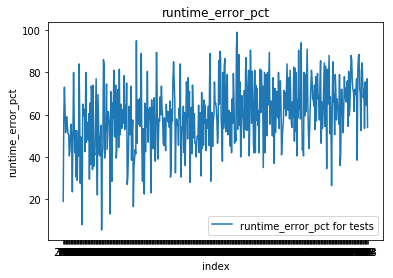

In [779]:
plt.plot(x, y, label = "runtime_error_pct for tests")
 

plt.xlabel('index')

plt.ylabel('runtime_error_pct')

plt.title('runtime_error_pct')
 

plt.legend()
 

plt.show()

In [780]:
y = df_vals['runtime_error_pct']
x = df_vals['idx']
x

0     939
1     906
2     888
3     936
4     949
     ... 
85    904
86    964
87    913
88    960
89    901
Name: idx, Length: 90, dtype: object

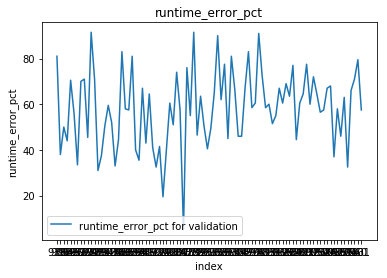

In [781]:
plt.plot(x, y, label = "runtime_error_pct for validation")
 
# naming the x axis
plt.xlabel('index')
# naming the y axis
plt.ylabel('runtime_error_pct')
# giving a title to my graph
plt.title('runtime_error_pct')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

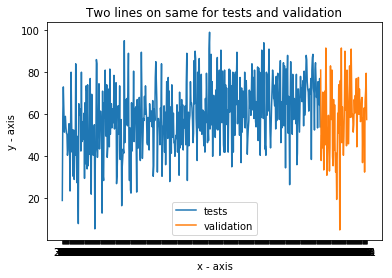

In [785]:
y1 = df_tests['runtime_error_pct']
x1 = df_tests['idx']

plt.plot(x1, y1, label = "tests")
 

y2 = df_vals['runtime_error_pct']
x2 = df_vals['idx']

plt.plot(x2, y2, label = "validation")
 

plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('Two lines on same for tests and validation')
 

plt.legend()
 

plt.show()

In [786]:
y = df_tests['SyntaxError']
x = df_tests['idx']

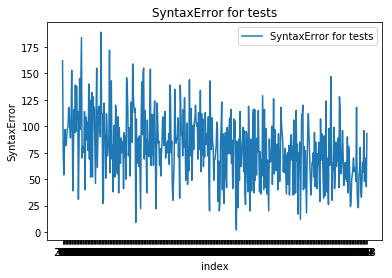

In [788]:
plt.plot(x, y, label = "SyntaxError for tests")
 

plt.xlabel('index')

plt.ylabel('SyntaxError')

plt.title('SyntaxError for tests')
 

plt.legend()
 

plt.show()

In [789]:
y = df_vals['SyntaxError']
x = df_vals['idx']

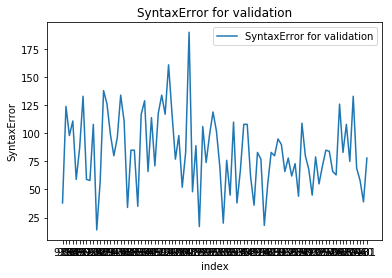

In [790]:
plt.plot(x, y, label = "SyntaxError for validation")
 

plt.xlabel('index')

plt.ylabel('SyntaxError')

plt.title('SyntaxError for validation')
 

plt.legend()
 

plt.show()

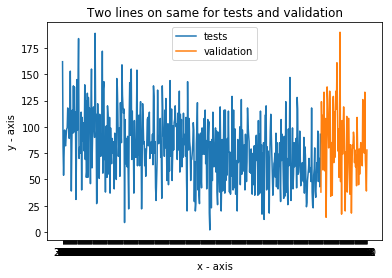

In [791]:
y1 = df_tests['SyntaxError']
x1 = df_tests['idx']

plt.plot(x1, y1, label = "tests")
 

y2 = df_vals['SyntaxError']
x2 = df_vals['idx']

plt.plot(x2, y2, label = "validation")
 

plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('Two lines on same for tests and validation')
 

plt.legend()
 

plt.show()

In [718]:
df_tests['SyntaxError'].mean()

79.742

In [739]:
df_tests['NameError'].mean()

116.532

TypeError in tests and index with null values

In [792]:
pd.DataFrame(df_tests[df_tests['TypeError'].isna()]['idx'])

,idx
0,241
3,87
4,381
5,108
6,117
...,...
493,169
496,84
497,234
498,122


Index in tests that failed tests

In [793]:
pd.DataFrame(df_tests[df_tests['Failed Tests'].isna()]['idx'])

,idx
0,241
2,391
3,87
4,381
5,108
...,...
490,112
491,89
492,292
494,502
